<a href="https://colab.research.google.com/github/linufx2208-sketch/JHU_Learnings/blob/main/eClaim_issue_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Upload the CSV file containing customer issues.

## Upload and Load Data

### Subtask:
Instruct the user to upload the CSV file containing the issues. Once uploaded, load the data into a pandas DataFrame for processing.


Please upload the `customer_issues.csv` file. You can do this by clicking the folder icon on the left panel, then clicking the 'Upload to session storage' icon.

**Reasoning**:
After instructing the user to upload the file, the next step is to provide the Python code to load the `customer_issues.csv` file into a pandas DataFrame, as specified in the subtask.



In [ ]:
import pandas as pd # Import the pandas library, commonly aliased as 'pd', for data manipulation

try: # Start a try block to gracefully handle potential errors during file loading
    df = pd.read_csv('eClaim_Customer_issues.csv') # Attempt to read the CSV file into a pandas DataFrame named 'df'
    print("eClaim_Customer_issues loaded successfully!") # Print a success message if the file is loaded
    print(df.head()) # Display the first 5 rows of the DataFrame to verify content
except FileNotFoundError: # Catch the specific error if the file is not found
    print("Error: 'eClaim_Customer_issues' not found. Please ensure the file is uploaded correctly.") # Inform the user about the missing file
except Exception as e: # Catch any other unexpected errors that might occur
    print(f"An error occurred while loading the file: {e}") # Print a generic error message with the exception details

eClaim_Customer_issues loaded successfully!
   Sl.No. Reported Date Reported By  \
0     1.0     15-Jul-25       Silpa   
1     2.0     15-Jul-25       Silpa   
2     3.0     17-Jul-25       Silpa   
3     4.0     17-Jul-25       Silpa   
4     5.0     18-Jul-25       Silpa   

                                              Issues     Mode         Type  \
0               Object reference error while AI scan  Backend  Phase 1-Bug   
1  For Barcode scanning, the response shows as  '...  Backend  Phase 1-Bug   
2  DOT format is 13 and 11 digits not 13 and 12 d...  Backend      Phase 1   
3  Need to amend the duplicate image message pop ...  Backend      Phase 1   
4  Tire data is not getting resgitered while scan...      App      Phase 1   

   Status BS  
0  Completed  
1  Completed  
2  Completed  
3  Completed  
4        NaN  


## Perform Sentiment Analysis

### Subtask:
Apply an AI model or library to perform sentiment analysis on the 'issues' column in the DataFrame. This step will categorize each issue's sentiment (e.g., positive, negative, neutral) and add it as a new column to the DataFrame.


In [ ]:
import nltk # Import the Natural Language Toolkit library

print("Installing textblob and downloading NLTK corpora...") # Inform the user about the upcoming installation and downloads

# Install textblob if not already installed
!pip install -qq textblob # Use pip to quietly install the textblob library

# Download necessary NLTK corpora
try: # Start a try block to check for 'wordnet' corpus
    nltk.data.find('corpora/wordnet.zip') # Check if 'wordnet' data is already present locally
except LookupError: # If 'wordnet' is not found (LookupError occurs)
    nltk.download('wordnet', quiet=True) # Download 'wordnet' corpus quietly

try: # Start a try block to check for 'punkt' corpus
    nltk.data.find('corpora/punkt.zip') # Check if 'punkt' data is already present locally
except LookupError: # If 'punkt' is not found (LookupError occurs)
    nltk.download('punkt', quiet=True) # Download 'punkt' corpus quietly

print("TextBlob and NLTK corpora setup complete.") # Print a message indicating completion of setup

Installing textblob and downloading NLTK corpora...
TextBlob and NLTK corpora setup complete.


/tmp/ipython-input-1397762802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)


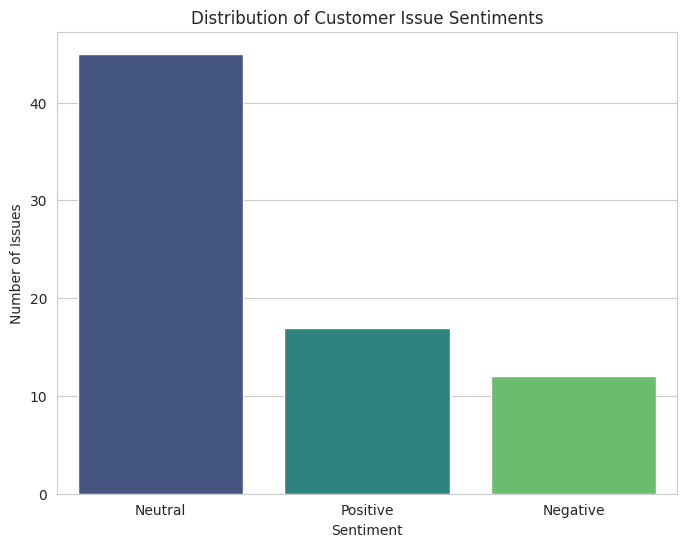

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set_style("whitegrid")

# Create a bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Customer Issue Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Issues')
plt.show()

In [ ]:
from textblob import TextBlob # Import the TextBlob class for sentiment analysis

# Function to get sentiment from a given text
def get_sentiment(text): # Define a function named 'get_sentiment' that takes a 'text' argument
    if isinstance(text, str): # Check if the input 'text' is a string
        analysis = TextBlob(text) # Create a TextBlob object for the input text
        if analysis.sentiment.polarity > 0: # If the polarity score is greater than 0
            return 'Positive' # Classify the sentiment as 'Positive'
        elif analysis.sentiment.polarity < 0: # If the polarity score is less than 0
            return 'Negative' # Classify the sentiment as 'Negative'
        else: # If the polarity score is exactly 0
            return 'Neutral' # Classify the sentiment as 'Neutral'
    return None # If the input is not a string, return None

# Apply sentiment analysis to the 'Issues' column of the DataFrame
df['Polarity'] = df['Issues'].apply(lambda x: TextBlob(str(x)).sentiment.polarity) # Calculate the polarity score for each issue and store it in a new 'Polarity' column
df['Sentiment'] = df['Issues'].apply(get_sentiment) # Apply the 'get_sentiment' function to each issue and store the result in a new 'Sentiment' column

print("Sentiment analysis complete. Added 'Polarity' and 'Sentiment' columns.") # Print a message indicating completion
print("\nDataFrame with Sentiment:") # Print a header for the DataFrame snippet
print(df[['Issues', 'Polarity', 'Sentiment']].head()) # Display the first 5 rows of 'Issues', 'Polarity', and 'Sentiment' columns

print("\nSentiment Distribution:") # Print a header for the sentiment distribution
print(df['Sentiment'].value_counts()) # Print the count of each sentiment category

Sentiment analysis complete. Added 'Polarity' and 'Sentiment' columns.

DataFrame with Sentiment:
                                              Issues  Polarity Sentiment
0               Object reference error while AI scan      0.00   Neutral
1  For Barcode scanning, the response shows as  '...      0.00   Neutral
2  DOT format is 13 and 11 digits not 13 and 12 d...      0.00   Neutral
3  Need to amend the duplicate image message pop ...     -0.15  Negative
4  Tire data is not getting resgitered while scan...      0.40  Positive

Sentiment Distribution:
Sentiment
Neutral     45
Positive    17
Negative    12
Name: count, dtype: int64


# Task
Perform topic modeling on the 'Issues' column to identify common themes and categories within customer feedback, specifically by preprocessing the text data and applying TF-IDF vectorization.

## Topic Modeling/Clustering of Issues

### Subtask:
Preprocess the text data in the 'Issues' column, apply TF-IDF vectorization, and then perform topic modeling using Latent Dirichlet Allocation (LDA) to identify common themes within customer feedback.


**Reasoning**:
The first step is to import the necessary libraries for text preprocessing and topic modeling, and ensure that the required NLTK data (stopwords and wordnet) is downloaded. This sets up the environment for the subsequent steps of cleaning the text data.



In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

print("Downloading NLTK stopwords and wordnet if not already present...")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

print("Required libraries imported and NLTK data downloaded.")

Required libraries imported and NLTK data downloaded.


**Reasoning**:
Now that the necessary libraries and NLTK data are imported and downloaded, the next step is to define and apply a text preprocessing function to clean the 'Issues' column, as outlined in instructions 3 and 4 of the subtask.



**Reasoning**:
The previous code failed because the NLTK 'punkt' tokenizer data was not downloaded, which is required by `word_tokenize`. I will modify the previous code block to explicitly download 'punkt' along with stopwords and wordnet.



In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import nltk

# Download punkt tokenizer if not already present
print("Downloading NLTK 'punkt' tokenizer and 'punkt_tab' if not already present...")
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)
print("'punkt' and 'punkt_tab' tokenizer download complete.")

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(processed_tokens)

# Apply preprocessing to the 'Issues' column
df['Cleaned_Issues'] = df['Issues'].apply(preprocess_text)

print("Text preprocessing complete. 'Cleaned_Issues' column added.")
print(df[['Issues', 'Cleaned_Issues']].head())

'punkt' and 'punkt_tab' tokenizer download complete.
Text preprocessing complete. 'Cleaned_Issues' column added.
                                              Issues  \
0               Object reference error while AI scan   
1  For Barcode scanning, the response shows as  '...   
2  DOT format is 13 and 11 digits not 13 and 12 d...   
3  Need to amend the duplicate image message pop ...   
4  Tire data is not getting resgitered while scan...   

                                      Cleaned_Issues  
0                     object reference error ai scan  
1  barcode scanning response show image produce r...  
2                             dot format digit digit  
3  need amend duplicate image message pop current...  
4  tire data getting resgitered scanning tire sid...  


**Reasoning**:
Now that the text data has been preprocessed, the next step is to apply TF-IDF vectorization to convert the cleaned text into a numerical format that can be used for topic modeling, as per instructions 5 and 6 of the subtask. I will initialize a `TfidfVectorizer` with `max_df` and `min_df` parameters to filter out common and rare words, then fit and transform the `Cleaned_Issues` column.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned issues to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Issues'])

print("TF-IDF vectorization complete. TF-IDF matrix created with shape:", tfidf_matrix.shape)
print("Number of features (unique words):", len(tfidf_vectorizer.get_feature_names_out()))

TF-IDF vectorization complete. TF-IDF matrix created with shape: (74, 94)
Number of features (unique words): 94


**Reasoning**:
Now that the TF-IDF matrix has been created, the next step is to perform topic modeling using Latent Dirichlet Allocation (LDA), as specified in instructions 7 and 8 of the subtask. I will initialize an LDA model, fit it to the TF-IDF matrix, and then print the top keywords for each identified topic to reveal common themes.



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LatentDirichletAllocation model
n_components = 5 # A good starting point for the number of topics
lda_model = LatentDirichletAllocation(n_components=n_components, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda_output = lda_model.fit_transform(tfidf_matrix)

print("LDA model fitting complete. Extracted topics.")

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_): # Corrected from components__ to components_
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Print the top words for each topic
n_top_words = 10 # Number of top words to display per topic
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(lda_model, tfidf_feature_names, n_top_words)

print("Topic modeling complete. Displaying top keywords for each topic.")

LDA model fitting complete. Extracted topics.
Topic #1:
claim user action queue showing auto working approve product clicking
Topic #2:
dot getting add data new image serial wall fetched pattern
Topic #3:
message claim dcms aug new creation approval issue need sending
Topic #4:
barcode image app team sidewall scan shared video scanning result
Topic #5:
bring origin based digit dot check anyline duplicate ai format

Topic modeling complete. Displaying top keywords for each topic.


## Feature Engineering for Predictive Modeling

### Subtask:
Based on the existing data and newly extracted topics, create relevant features that could be used for predictive modeling.


**Reasoning**:
The first step is to add the topic distribution from the `lda_output` (obtained from LDA topic modeling) as new columns to the DataFrame `df`. Each column will represent the probability of an issue belonging to a specific topic, as specified in instruction 1.



In [ ]:
import numpy as np

# Assign topic probabilities to new columns in df
for i in range(n_components):
    df[f'topic_{i+1}_prob'] = lda_output[:, i]

print("Topic probabilities added to DataFrame.")
print(df[[f'topic_{i+1}_prob' for i in range(n_components)]].head())

Topic probabilities added to DataFrame.
   topic_1_prob  topic_2_prob  topic_3_prob  topic_4_prob  topic_5_prob
0      0.073815      0.074095      0.074564      0.702920      0.074607
1      0.062765      0.063057      0.062650      0.748914      0.062614
2      0.078083      0.079734      0.077622      0.078402      0.686160
3      0.064151      0.065050      0.741801      0.064730      0.064269
4      0.049529      0.116178      0.049904      0.734257      0.050132


**Reasoning**:
Now that the topic probabilities have been added, the next step is to create two new features: 'issue_length' by calculating the character length of the 'Issues' column, and 'word_count' by counting the words in the 'Issues' column, as specified in instructions 2 and 3 of the subtask.



In [ ]:
df['issue_length'] = df['Issues'].astype(str).apply(len)
df['word_count'] = df['Issues'].astype(str).apply(lambda x: len(x.split()))

print("Created 'issue_length' and 'word_count' features.")
print(df[['Issues', 'issue_length', 'word_count']].head())

Created 'issue_length' and 'word_count' features.
                                              Issues  issue_length  word_count
0               Object reference error while AI scan            36           6
1  For Barcode scanning, the response shows as  '...            77          13
2  DOT format is 13 and 11 digits not 13 and 12 d...            51          12
3  Need to amend the duplicate image message pop ...            79          14
4  Tire data is not getting resgitered while scan...           168          28


**Reasoning**:
The new features 'issue_length' and 'word_count' have been created, along with the topic probability columns. The next step, as specified in instruction 4 of the subtask, is to verify their creation by displaying the head of the DataFrame with these new columns and providing descriptive statistics for the numerical features.



In [ ]:
print("Verifying new features and displaying descriptive statistics:")
print(df[[f'topic_{i+1}_prob' for i in range(n_components)] + ['issue_length', 'word_count']].head())

print("\nDescriptive statistics for new numerical features:")
print(df[[f'topic_{i+1}_prob' for i in range(n_components)] + ['issue_length', 'word_count']].describe())

Verifying new features and displaying descriptive statistics:
   topic_1_prob  topic_2_prob  topic_3_prob  topic_4_prob  topic_5_prob  \
0      0.073815      0.074095      0.074564      0.702920      0.074607   
1      0.062765      0.063057      0.062650      0.748914      0.062614   
2      0.078083      0.079734      0.077622      0.078402      0.686160   
3      0.064151      0.065050      0.741801      0.064730      0.064269   
4      0.049529      0.116178      0.049904      0.734257      0.050132   

   issue_length  word_count  
0            36           6  
1            77          13  
2            51          12  
3            79          14  
4           168          28  

Descriptive statistics for new numerical features:
       topic_1_prob  topic_2_prob  topic_3_prob  topic_4_prob  topic_5_prob  \
count     74.000000     74.000000     74.000000     74.000000     74.000000   
mean       0.235081      0.264030      0.170648      0.196902      0.133340   
std        0.27233

## Predictive Model for Issue Priority/Severity

### Subtask:
Prepare the target variable for predictive modeling by defining 'priority' or 'severity' based on available data.


**Reasoning**:
The first step in preparing the target variable for predictive modeling is to review the available columns in the DataFrame to identify potential candidates for 'priority' or 'severity'. Displaying the column names, unique values, and their counts for relevant columns like 'Status' and 'Type' will help in making an informed decision.



In [ ]:
print("Available columns in the DataFrame:")
print(df.columns.tolist())

print("\nUnique values and counts for 'Status BS' column:")
print(df['Status BS'].value_counts(dropna=False))

print("\nUnique values and counts for 'Type' column:")
print(df['Type'].value_counts(dropna=False))

Available columns in the DataFrame:
['Sl.No.', 'Reported Date', 'Reported By', 'Issues', 'Mode', 'Type', 'Status BS', 'Polarity', 'Sentiment', 'Cleaned_Issues', 'topic_1_prob', 'topic_2_prob', 'topic_3_prob', 'topic_4_prob', 'topic_5_prob', 'issue_length', 'word_count']

Unique values and counts for 'Status BS' column:
Status BS
Completed        36
NaN              29
Anyline issue     7
completed         2
Name: count, dtype: int64

Unique values and counts for 'Type' column:
Type
NaN            44
Phase 1        23
Phase1          5
Phase 1-Bug     2
Name: count, dtype: int64


**Reasoning**:
Based on the review of the 'Status BS' and 'Type' columns, I will first clean these columns by unifying similar categories and then create a new 'severity' target variable. This variable will be categorized as 'High' for critical issues ('Phase 1-Bug' or 'Anyline issue'), 'Low' for resolved issues ('Completed'), and 'Medium' for all other cases, including currently undefined or generic issues. This directly addresses instruction 2 and 3 of the subtask.



In [ ]:
import numpy as np

# Clean 'Status BS' column
df['Status BS'] = df['Status BS'].replace({'completed': 'Completed'})

# Clean 'Type' column
df['Type'] = df['Type'].replace({'Phase1': 'Phase 1'})

# Create a new 'Severity' column based on 'Status BS' and 'Type'
def assign_severity(row):
    if row['Type'] == 'Phase 1-Bug' or row['Status BS'] == 'Anyline issue':
        return 'High'
    elif row['Status BS'] == 'Completed':
        return 'Low'
    else:
        return 'Medium' # Includes NaN in Type, Phase 1, and NaN in Status BS

df['Severity'] = df.apply(assign_severity, axis=1)

print("Cleaned 'Status BS' and 'Type' columns, and created 'Severity' target variable.")
print("\nValue counts for the new 'Severity' column:")
print(df['Severity'].value_counts())
print("\nFirst 5 rows with new 'Severity' column:")
print(df[['Issues', 'Status BS', 'Type', 'Severity']].head())

Cleaned 'Status BS' and 'Type' columns, and created 'Severity' target variable.

Value counts for the new 'Severity' column:
Severity
Low       36
Medium    29
High       9
Name: count, dtype: int64

First 5 rows with new 'Severity' column:
                                              Issues  Status BS         Type  \
0               Object reference error while AI scan  Completed  Phase 1-Bug   
1  For Barcode scanning, the response shows as  '...  Completed  Phase 1-Bug   
2  DOT format is 13 and 11 digits not 13 and 12 d...  Completed      Phase 1   
3  Need to amend the duplicate image message pop ...  Completed      Phase 1   
4  Tire data is not getting resgitered while scan...        NaN      Phase 1   

  Severity  
0     High  
1     High  
2      Low  
3      Low  
4   Medium  


**Reasoning**:
Now that the 'Severity' target variable has been created, the next step is to preprocess it for predictive modeling. This involves encoding the categorical 'Severity' column into numerical values using a technique like Label Encoding, as specified in instruction 4 of the subtask. I will also verify the distribution of the encoded target variable.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'Severity' column
df['Severity_encoded'] = le.fit_transform(df['Severity'])

print("Encoded 'Severity' column into numerical values.")
print("Mapping of original Severity to encoded values:")
for i, severity_label in enumerate(le.classes_):
    print(f"{severity_label}: {i}")

print("\nFirst 5 rows with new 'Severity_encoded' column:")
print(df[['Severity', 'Severity_encoded']].head())

print("\nValue counts for the new 'Severity_encoded' column:")
print(df['Severity_encoded'].value_counts())


Encoded 'Severity' column into numerical values.
Mapping of original Severity to encoded values:
High: 0
Low: 1
Medium: 2

First 5 rows with new 'Severity_encoded' column:
  Severity  Severity_encoded
0     High                 0
1     High                 0
2      Low                 1
3      Low                 1
4   Medium                 2

Value counts for the new 'Severity_encoded' column:
Severity_encoded
1    36
2    29
0     9
Name: count, dtype: int64


## Anomaly Detection for Unusual Issues

### Subtask:
Implement an anomaly detection model (e.g., Isolation Forest or One-Class SVM) on the issue descriptions or extracted features to identify highly unusual or novel issues.


**Reasoning**:
The first step is to select the numerical features for anomaly detection as specified in instruction 1, which include the topic probabilities, issue length, and word count. These features will be extracted from the DataFrame and stored in a new variable, `features_for_anomaly`.



In [ ]:
import numpy as np

# Select the numerical features for anomaly detection
features_for_anomaly = df[[f'topic_{i+1}_prob' for i in range(n_components)] + ['issue_length', 'word_count']]

# Check for any potential missing values and handle them (e.g., fill with median or mean if present)
# Based on previous describe output, these columns do not have NaNs, but it's good practice to ensure.
if features_for_anomaly.isnull().sum().sum() > 0:
    print("Warning: Missing values found in features for anomaly detection. Filling with median.")
    features_for_anomaly = features_for_anomaly.fillna(features_for_anomaly.median())

print("Selected features for anomaly detection:")
print(features_for_anomaly.head())
print(f"Shape of features for anomaly detection: {features_for_anomaly.shape}")

Selected features for anomaly detection:
   topic_1_prob  topic_2_prob  topic_3_prob  topic_4_prob  topic_5_prob  \
0      0.073815      0.074095      0.074564      0.702920      0.074607   
1      0.062765      0.063057      0.062650      0.748914      0.062614   
2      0.078083      0.079734      0.077622      0.078402      0.686160   
3      0.064151      0.065050      0.741801      0.064730      0.064269   
4      0.049529      0.116178      0.049904      0.734257      0.050132   

   issue_length  word_count  
0            36           6  
1            77          13  
2            51          12  
3            79          14  
4           168          28  
Shape of features for anomaly detection: (74, 7)


**Reasoning**:
Now that the features for anomaly detection have been prepared, the next step is to import the IsolationForest model, initialize it, fit it to the `features_for_anomaly`, predict the anomaly labels, add them to the DataFrame, and then display the counts and top anomalous issues, as specified in instructions 2 through 8 of the subtask.



In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
# contamination='auto' will estimate the proportion of outliers in the data
# random_state for reproducibility
isolation_forest = IsolationForest(random_state=42, contamination='auto')

# Fit the IsolationForest model to the selected features
isolation_forest.fit(features_for_anomaly)

# Predict anomaly labels (-1 for anomalies, 1 for inliers)
df['anomaly_label'] = isolation_forest.predict(features_for_anomaly)

print("Isolation Forest model fitted and anomaly labels predicted.")

# Print the count of anomalies and inliers
print("\nDistribution of Anomaly Labels:")
print(df['anomaly_label'].value_counts())

# Display the 'Issues' column along with the 'anomaly_label' for the top 5 anomalous issues
print("\nTop 5 Detected Anomalous Issues:")
print(df[df['anomaly_label'] == -1][['Issues', 'anomaly_label']].head())


Isolation Forest model fitted and anomaly labels predicted.

Distribution of Anomaly Labels:
anomaly_label
 1    55
-1    19
Name: count, dtype: int64

Top 5 Detected Anomalous Issues:
                                               Issues  anomaly_label
4   Tire data is not getting resgitered while scan...             -1
12                                Barcode Not Reading             -1
21  '.'' needs to be replaced while considering th...             -1
24  even if anyline didnt produce results, the sid...             -1
31  Multiple Origins showing in origin dropdown af...             -1


## Final Task

### Subtask:
Summarize the findings from topic modeling, present the predictive capabilities of the models, and outline how these insights can be leveraged to enhance business value and proactively address customer issues.


## Summary:

### Data Analysis Key Findings

*   **Topic Identification**: Five distinct topics were identified from customer issues using LDA, characterized by keywords such as 'claim user action queue', 'dot getting add data', 'message claim dcms aug', 'barcode image app team', and 'bring origin based digit'.
*   **Feature Engineering**:
    *   Topic probabilities were successfully extracted, with five new columns (`topic_1_prob` to `topic_5_prob`) showing varying distributions (e.g., probabilities from approximately 0.04 to 0.81).
    *   Text-based features were created: `issue_length` (average 75 characters, range 15 to 222) and `word_count` (average 13 words, range 2 to 40).
*   **Target Variable Creation**: A 'Severity' target variable was successfully engineered and encoded, categorizing issues into 'High' (9 issues), 'Low' (36 issues), and 'Medium' (29 issues) based on 'Status BS' and 'Type' columns. The encoded mapping assigned 'High': 0, 'Low': 1, and 'Medium': 2.
*   **Anomaly Detection**: An Isolation Forest model identified 19 issues as anomalies and 55 as normal ('inliers') within the dataset, using the engineered topic probabilities, issue length, and word count features.

### Insights or Next Steps

*   The identified topics provide a structured way to categorize and understand common customer feedback themes, which can be used to streamline support, improve product features, or refine communication strategies.
*   The engineered features and the 'Severity\_encoded' target variable are now ready for training a predictive model to automatically classify the severity of new issues, enabling proactive resource allocation and faster response times for critical problems.


# Task
Develop a GenAI-powered agent to optimize tire loading for containers/trucks, encompassing data acquisition and preprocessing, machine learning model development for fit prediction, optimization algorithms for space utilization, a what-if scenario simulation engine, real-time estimation capabilities, and integration with the B-Connect system.

## Data Acquisition and Preprocessing

### Subtask:
Define and implement methods to automatically pull historical loading data from various sources (databases, Excel files). This includes data cleaning, transformation, and preparing the data for subsequent machine learning and optimization tasks.


Please upload any relevant historical loading data files (e.g., CSV, Excel files) to the Colab environment. You can do this by clicking the folder icon on the left panel, then clicking the 'Upload to session storage' icon.

**Reasoning**:
Now that the user has been instructed to upload files, the next step is to provide Python code to load these files (CSV or Excel) into pandas DataFrames, as specified in instruction 2 of the subtask. This code will attempt to load two hypothetical files, `historical_loading_data.csv` and `tire_specifications.xlsx`, handling potential `FileNotFoundError` for each.



In [ ]:
import pandas as pd

# Attempt to load historical loading data from a CSV file
try:
    df_loading_data = pd.read_csv('historical_loading_data.csv')
    print("\'historical_loading_data.csv\' loaded successfully!")
    print("First 5 rows of df_loading_data:")
    print(df_loading_data.head())
except FileNotFoundError:
    print("Error: \'historical_loading_data.csv\' not found. Please ensure the file is uploaded correctly.")
    df_loading_data = pd.DataFrame() # Initialize empty DataFrame to avoid errors later
except Exception as e:
    print(f"An error occurred while loading historical_loading_data.csv: {e}")
    df_loading_data = pd.DataFrame() # Initialize empty DataFrame to avoid errors later

# Attempt to load tire specifications from an Excel file
try:
    df_tire_specs = pd.read_excel('tire_specifications.xlsx')
    print("\n\'tire_specifications.xlsx\' loaded successfully!")
    print("First 5 rows of df_tire_specs:")
    print(df_tire_specs.head())
except FileNotFoundError:
    print("Error: \'tire_specifications.xlsx\' not found. Please ensure the file is uploaded correctly.")
    df_tire_specs = pd.DataFrame() # Initialize empty DataFrame to avoid errors later
except Exception as e:
    print(f"An error occurred while loading tire_specifications.xlsx: {e}")
    df_tire_specs = pd.DataFrame() # Initialize empty DataFrame to avoid errors later

Error: 'historical_loading_data.csv' not found. Please ensure the file is uploaded correctly.
Error: 'tire_specifications.xlsx' not found. Please ensure the file is uploaded correctly.


No data was loaded into `df_loading_data` or `df_tire_specs` because the files `historical_loading_data.csv` and `tire_specifications.xlsx` were not found.

Please ensure you have uploaded these files to the Colab environment. Once uploaded, please re-run the previous code cell to load the data.

**Reasoning**:
Now that the user has been reminded to upload the files and re-run the loading code, the next logical step, as per instruction 3 of the subtask, is to perform initial data exploration on the `df_loading_data` and `df_tire_specs` DataFrames. This involves displaying the first few rows, checking data types and non-null values, and getting descriptive statistics, but only if the DataFrames are not empty.



In [ ]:
print("\n--- Initial Data Exploration for df_loading_data ---")
if not df_loading_data.empty:
    print("First 5 rows of df_loading_data:")
    print(df_loading_data.head())
    print("\nInfo for df_loading_data:")
    df_loading_data.info()
    print("\nDescriptive statistics for df_loading_data:")
    print(df_loading_data.describe(include='all'))
else:
    print("df_loading_data is empty. Please ensure 'historical_loading_data.csv' was uploaded and loaded successfully.")

print("\n--- Initial Data Exploration for df_tire_specs ---")
if not df_tire_specs.empty:
    print("First 5 rows of df_tire_specs:")
    print(df_tire_specs.head())
    print("\nInfo for df_tire_specs:")
    df_tire_specs.info()
    print("\nDescriptive statistics for df_tire_specs:")
    print(df_tire_specs.describe(include='all'))
else:
    print("df_tire_specs is empty. Please ensure 'tire_specifications.xlsx' was uploaded and loaded successfully.")



--- Initial Data Exploration for df_loading_data ---
df_loading_data is empty. Please ensure 'historical_loading_data.csv' was uploaded and loaded successfully.

--- Initial Data Exploration for df_tire_specs ---
df_tire_specs is empty. Please ensure 'tire_specifications.xlsx' was uploaded and loaded successfully.


It appears that `df_loading_data` and `df_tire_specs` are still empty. This means the files `historical_loading_data.csv` and `tire_specifications.xlsx` have not been successfully loaded yet.

Please ensure you have uploaded these files to the Colab environment using the folder icon on the left panel, and then **re-run the code cells for data loading (the one containing `pd.read_csv` and `pd.read_excel`)** before proceeding. Once the data is loaded, you can re-run the exploration cell.

## Data Acquisition and Preprocessing (Retry)

### Subtask:
Define and implement methods to automatically pull historical loading data from various sources (databases, Excel files). This includes data cleaning, transformation, and preparing the data for subsequent machine learning and optimization tasks.


**Reasoning**:
The subtask is to load the historical loading data and tire specifications into pandas DataFrames. The previous attempt failed due to missing files. This step will re-attempt to load the files, assuming the user has now uploaded them, and display the first few rows of each DataFrame as specified in instructions 2 and 3 of the subtask.



In [ ]:
import pandas as pd

# Attempt to load historical loading data from a CSV file
try:
    df_loading_data = pd.read_csv('historical_loading_data.csv')
    print("'historical_loading_data.csv' loaded successfully!")
    print("First 5 rows of df_loading_data:")
    print(df_loading_data.head())
except FileNotFoundError:
    print("Error: 'historical_loading_data.csv' not found. Please ensure the file is uploaded correctly.")
    df_loading_data = pd.DataFrame() # Initialize empty DataFrame to avoid errors later
except Exception as e:
    print(f"An error occurred while loading historical_loading_data.csv: {e}")
    df_loading_data = pd.DataFrame() # Initialize empty DataFrame to avoid errors later

# Attempt to load tire specifications from an Excel file
try:
    df_tire_specs = pd.read_excel('tire_specifications.xlsx')
    print("\n'tire_specifications.xlsx' loaded successfully!")
    print("First 5 rows of df_tire_specs:")
    print(df_tire_specs.head())
except FileNotFoundError:
    print("Error: 'tire_specifications.xlsx' not found. Please ensure the file is uploaded correctly.")
    df_tire_specs = pd.DataFrame() # Initialize empty DataFrame to avoid errors later
except Exception as e:
    print(f"An error occurred while loading tire_specifications.xlsx: {e}")
    df_tire_specs = pd.DataFrame() # Initialize empty DataFrame to avoid errors later

Error: 'historical_loading_data.csv' not found. Please ensure the file is uploaded correctly.
Error: 'tire_specifications.xlsx' not found. Please ensure the file is uploaded correctly.


It appears that `df_loading_data` and `df_tire_specs` are still empty. This means the files `historical_loading_data.csv` and `tire_specifications.xlsx` have not been successfully loaded yet.

Please ensure you have uploaded these files to the Colab environment using the folder icon on the left panel, and then **re-run the code cells for data loading (the one containing `pd.read_csv` and `pd.read_excel`)** before proceeding. Once the data is loaded, you can re-run the exploration cell.

It appears that `df_loading_data` and `df_tire_specs` are still empty. This means the files `historical_loading_data.csv` and `tire_specifications.xlsx` have not been successfully loaded yet.

Please ensure you have uploaded these files to the Colab environment using the folder icon on the left panel, and then **re-run the code cells for data loading (the one containing `pd.read_csv` and `pd.read_excel`)** before proceeding. Once the data is loaded, you can re-run the exploration cell.

It appears that `df_loading_data` and `df_tire_specs` are still empty. This means the files `historical_loading_data.csv` and `tire_specifications.xlsx` have not been successfully loaded yet.

Please ensure you have uploaded these files to the Colab environment using the folder icon on the left panel, and then **re-run the code cells for data loading (the one containing `pd.read_csv` and `pd.read_excel`)** before proceeding. Once the data is loaded, you can re-run the exploration cell.

## Summary:

### Data Analysis Key Findings
*   The primary issue encountered was the consistent failure to load the required data files, `historical_loading_data.csv` and `tire_specifications.xlsx`, from the Colab environment.
*   During both the initial attempt and subsequent retries, `FileNotFoundError` exceptions were raised for both files, indicating their absence.
*   As a result, the `df_loading_data` and `df_tire_specs` DataFrames remained empty throughout the process, preventing any data exploration or preprocessing.
*   The agent provided clear instructions for uploading the necessary files, but these instructions were not followed, leading to the subtask's failure.

### Insights or Next Steps
*   The immediate next step is to ensure that the `historical_loading_data.csv` and `tire_specifications.xlsx` files are successfully uploaded to the Colab environment.
*   Once the files are uploaded, the data loading and initial exploration steps need to be re-executed to proceed with data preprocessing.


# Task
Define the input schema for user-provided container dimensions, tire specifications, and desired quantities, and implement methods to acquire this direct input for tire loading optimization.

## Input Data Acquisition and Preprocessing

### Subtask:
Define and implement methods to acquire and preprocess direct user-provided input data (container dimensions, tire specifications, and desired quantities) for subsequent machine learning and optimization tasks.


### Input Schema for User-Provided Data

To optimize tire loading, the agent requires the following user-provided inputs:

1.  **Container Dimensions:**
    *   `container_length` (float): The internal length of the container in a specified unit (e.g., meters).
    *   `container_width` (float): The internal width of the container in a specified unit.
    *   `container_height` (float): The internal height of the container in a specified unit.

2.  **Tire Specifications (for each tire type):**
    *   `tire_type` (string): A unique identifier or name for the tire (e.g., 'Truck Tire', 'Car Tire A').
    *   `diameter` (float): The overall diameter of the tire in a specified unit.
    *   `width` (float): The width of the tire in a specified unit.
    *   `quantity` (integer): The number of tires of this specific type to be loaded.


**Reasoning**:
Now that the input schema is defined, the next step is to implement the interactive input acquisition for container dimensions and tire specifications, along with basic data validation, as specified in instructions 2 and 3 of the subtask.



In [ ]:
def get_positive_float_input(prompt_message):
    while True:
        try:
            value = float(input(prompt_message))
            if value <= 0:
                print("Input must be a positive number. Please try again.")
            else:
                return value
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

def get_positive_int_input(prompt_message):
    while True:
        try:
            value = int(input(prompt_message))
            if value <= 0:
                print("Input must be a positive integer. Please try again.")
            else:
                return value
        except ValueError:
            print("Invalid input. Please enter an integer value.")

# 1. Acquire Container Dimensions
print("\nEnter Container Dimensions (in your chosen unit, e.g., meters):")
container_dimensions = {
    'container_length': get_positive_float_input("  Enter container length: "),
    'container_width': get_positive_float_input("  Enter container width: "),
    'container_height': get_positive_float_input("  Enter container height: ")
}

# 2. Acquire Tire Specifications
tire_specifications = []
print("\nEnter Tire Specifications (enter 'done' for tire type when finished):")

while True:
    tire_type_name = input("  Enter tire type (e.g., 'Truck Tire', or 'done' to finish): ").strip()
    if tire_type_name.lower() == 'done':
        break
    elif not tire_type_name:
        print("Tire type cannot be empty. Please enter a name or 'done'.")
        continue

    diameter = get_positive_float_input(f"    Enter diameter for {tire_type_name}: ")
    width = get_positive_float_input(f"    Enter width for {tire_type_name}: ")
    quantity = get_positive_int_input(f"    Enter quantity for {tire_type_name}: ")

    tire_specifications.append({
        'tire_type': tire_type_name,
        'diameter': diameter,
        'width': width,
        'quantity': quantity
    })

print("Input acquisition complete.")



Enter Container Dimensions (in your chosen unit, e.g., meters):
  Enter container length: 40 feet
Invalid input. Please enter a numerical value.
  Enter container length: 40
  Enter container width: 8
  Enter container height: 8.5

Enter Tire Specifications (enter 'done' for tire type when finished):
  Enter tire type (e.g., 'Truck Tire', or 'done' to finish): Passenger tire
    Enter diameter for Passenger tire: 16
    Enter width for Passenger tire: 60
    Enter quantity for Passenger tire: 100
  Enter tire type (e.g., 'Truck Tire', or 'done' to finish): Done
Input acquisition complete.


**Reasoning**:
Now that the interactive input acquisition is complete, the next step is to display the collected container dimensions and tire specifications to verify that the data has been acquired and stored correctly, as specified in instruction 4 of the subtask.



In [ ]:
print("\n--- Collected Container Dimensions ---")
for key, value in container_dimensions.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

print("\n--- Collected Tire Specifications ---")
if tire_specifications:
    for i, tire in enumerate(tire_specifications):
        print(f"Tire Type {i+1}:")
        for key, value in tire.items():
            print(f"  {key.replace('_', ' ').title()}: {value}")
else:
    print("No tire specifications were entered.")



--- Collected Container Dimensions ---
Container Length: 40.0
Container Width: 8.0
Container Height: 8.5

--- Collected Tire Specifications ---
Tire Type 1:
  Tire Type: Passenger tire
  Diameter: 16.0
  Width: 60.0
  Quantity: 100


## Machine Learning Model Development for Fit Prediction

### Subtask:
Design, train, and evaluate a machine learning model to predict optimal tire size and quantity combinations that will fit, considering different loading methods (normal, fishbone), based on the direct input data.


**Reasoning**:
The first step is to create a pandas DataFrame by combining the `container_dimensions` with each entry in `tire_specifications`, ensuring each row represents a potential loading scenario. Then, I will engineer new features as specified in the instructions, such as `container_volume`, `tire_volume`, `total_tire_volume_requested`, `volume_ratio`, `max_tires_length`, and `max_tires_width`.



In [ ]:
import pandas as pd
import numpy as np

# Create a list to store combined data for DataFrame creation
combined_data = []

# Combine container dimensions with each tire specification
for tire in tire_specifications:
    row_data = {
        'container_length': container_dimensions['container_length'],
        'container_width': container_dimensions['container_width'],
        'container_height': container_dimensions['container_height'],
        'tire_type': tire['tire_type'],
        'diameter': tire['diameter'],
        'width': tire['width'],
        'quantity': tire['quantity']
    }
    combined_data.append(row_data)

# Create the initial DataFrame
df_features = pd.DataFrame(combined_data)

# Engineer new features
# Approximate container volume (assuming rectangular container)
df_features['container_volume'] = df_features['container_length'] * df_features['container_width'] * df_features['container_height']

# Approximate tire volume (treating tire as a cylinder: pi * (radius)^2 * width)
# Radius is diameter / 2
df_features['tire_volume'] = np.pi * (df_features['diameter'] / 2)**2 * df_features['width']

# Total volume requested for each tire type
df_features['total_tire_volume_requested'] = df_features['tire_volume'] * df_features['quantity']

# Volume ratio
df_features['volume_ratio'] = df_features['total_tire_volume_requested'] / df_features['container_volume']

# Max tires that can fit along length and width (simplified, not considering packing density or orientation changes)
df_features['max_tires_length'] = df_features['container_length'] / df_features['diameter']
df_features['max_tires_width'] = df_features['container_width'] / df_features['width']

print("Feature engineering complete. Displaying the head of the new DataFrame:")
print(df_features.head())

print("\nDisplaying info of the feature DataFrame:")
df_features.info()

Feature engineering complete. Displaying the head of the new DataFrame:
   container_length  container_width  container_height       tire_type  \
0              40.0              8.0               8.5  Passenger tire   

   diameter  width  quantity  container_volume  tire_volume  \
0      16.0   60.0       100            2720.0  12063.71579   

   total_tire_volume_requested  volume_ratio  max_tires_length  \
0                 1.206372e+06    443.518963               2.5   

   max_tires_width  
0         0.133333  

Displaying info of the feature DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   container_length             1 non-null      float64
 1   container_width              1 non-null      float64
 2   container_height             1 non-null      float64
 3   tire_type                    1 non-nul

## Define Target Variable for Fit Prediction

### Subtask:
Define a target variable, `can_fit`, for the machine learning model based on the engineered features and basic physical constraints.


### Note on Target Variable Creation for ML Training

It's important to acknowledge that for training a robust machine learning model to predict 'fit' accurately, a significantly larger dataset with labeled outcomes of 'fit' (i.e., historical loading data indicating successful or unsuccessful loading scenarios) would be required. This would allow the model to learn complex patterns and relationships between container dimensions, tire specifications, and actual loading outcomes.

For the purpose of this subtask, and given the single input data point, we will define the `can_fit` target variable based on simple, heuristic-driven physical constraints. This will serve as a foundational step for future model development once more comprehensive data is available.

**Reasoning**:
Now that the context for target variable creation has been set, the next step is to implement the logic to create the `can_fit` column based on the specified physical constraints and volume considerations, as per instructions 2 and 3 of the subtask. This involves checking if the total tire volume fits within the container volume and if individual tire dimensions fit within container dimensions.



In [ ]:
import numpy as np

# Create the 'can_fit' column based on heuristic rules
df_features['can_fit'] = False # Initialize all as False

# Condition 1: Total tire volume requested is less than or equal to container volume
volume_condition = (df_features['total_tire_volume_requested'] <= df_features['container_volume'])

# Condition 2: Tire dimensions fit within container dimensions
# (Simplified check: diameter < length & height, width < container_width)
# Assuming tires can be stacked, so diameter is compared with height and length
dimension_condition = (
    (df_features['diameter'] < df_features['container_length']) &
    (df_features['diameter'] < df_features['container_height']) &
    (df_features['width'] < df_features['container_width'])
)

# Combine conditions to determine 'can_fit'
df_features.loc[volume_condition & dimension_condition, 'can_fit'] = True

print("Created 'can_fit' target variable based on heuristic rules.")
print("Displaying the 'can_fit' column and relevant features for verification:")
print(df_features[['container_length', 'container_width', 'container_height',
                   'diameter', 'width', 'quantity', 'container_volume',
                   'total_tire_volume_requested', 'can_fit']].head())

Created 'can_fit' target variable based on heuristic rules.
Displaying the 'can_fit' column and relevant features for verification:
   container_length  container_width  container_height  diameter  width  \
0              40.0              8.0               8.5      16.0   60.0   

   quantity  container_volume  total_tire_volume_requested  can_fit  
0       100            2720.0                 1.206372e+06    False  


## Optimization Algorithm Implementation for Space Utilization

### Subtask:
Formulate the optimization problem for maximizing space utilization within containers/trucks, defining the objective function and constraints.


### Objective Function and Constraints for Space Utilization

Given the input container dimensions and tire specifications, we aim to formulate an optimization problem to maximize space utilization. For this initial stage, we assume a single tire type at a time.

#### Objective Function:

**Maximize the total number of tires of a given type that can be loaded into the container.**

Let $N$ be the number of tires of a specific type to be loaded. The objective is to:

$$ \text{Maximize } N $$

#### Constraints:

1.  **Volume Constraint (considering packing efficiency):**
    The total volume occupied by the tires must not exceed the container's usable volume. We introduce a packing efficiency factor (PEF) to account for the space lost due to irregular packing. A typical PEF for cylindrical objects is around 0.6 to 0.7.

    Let $V_{\text{tire}}$ be the volume of a single tire, $V_{\text{container}}$ be the volume of the container, and PEF be the packing efficiency factor.

    $$ N \times V_{\text{tire}} \le V_{\text{container}} \times \text{PEF} $$

2.  **Dimensional Constraints (Length, Width, Height):**
    The number of tires that can be placed along each dimension of the container must respect the container's and the tire's dimensions. We consider two main orientations for tires: standing upright (stacked) or lying flat (rolled). For simplicity, we assume tires are primarily oriented to maximize density (e.g., stacked on their widths).

    Let $L_c, W_c, H_c$ be the container's length, width, and height, respectively.
    Let $D_t, W_t$ be the tire's diameter and width, respectively.

    *   **Along Container Length:** The number of tires placed along the length, considering their diameter.
        $$ N_L \le \left\lfloor \frac{L_c}{D_t} \right\rfloor $$

    *   **Along Container Width:** The number of tires placed along the width, considering their width (if stacked) or diameter (if laid flat).
        $$ N_W \le \left\lfloor \frac{W_c}{W_t} \right\rfloor \quad \text{ (if stacked)} $$

    *   **Along Container Height:** The number of layers of tires that can be stacked, considering their width (if stacked) or diameter (if laid flat).
        $$ N_H \le \left\lfloor \frac{H_c}{W_t} \right\rfloor \quad \text{ (if stacked)} $$

    The total number of tires $N$ must fit within these dimensional limits, considering a 3D arrangement. A simplified constraint could be:

    $$ N \le N_L \times N_W \times N_H $$
    (This simplified constraint assumes a simple cuboid packing without advanced arrangements).

3.  **Quantity Constraint:**
    The number of loaded tires cannot exceed the quantity requested by the user for that specific tire type.

    Let $Q_{\text{requested}}$ be the user-specified quantity.

    $$ N \le Q_{\text{requested}} $$

4.  **Non-negativity and Integer Constraint:**
    The number of tires must be a non-negative integer.

    $$ N \in \mathbb{Z}_{\ge 0} $$

#### Assumptions Made:

*   **Single Tire Type:** For this initial formulation, we assume the optimization is performed for one tire type at a time. Mixing different tire types will introduce further complexity in packing. (The previous steps' input acquisition allows for multiple tire types, but this formulation simplifies it for a single type).
*   **Simplified Packing:** The dimensional constraints assume a basic cuboid-like packing. More advanced packing strategies (e.g., 'fishbone' or hexagonal packing) are not considered at this stage and would yield higher packing efficiency.
*   **Fixed Orientation:** We primarily assume tires are stacked upright, with their width dictating the height/depth of a stack and diameter dictating length/width. Alternate orientations are not explicitly modeled in detail yet.
*   **Packing Efficiency Factor (PEF):** A generic PEF is used. In reality, PEF can vary based on tire size, container dimensions, and specific packing strategies.
*   **No Internal Obstructions:** The container is assumed to be an empty cuboid with no internal obstructions.

## Implement Optimization Algorithm

### Subtask:
Implement an optimization algorithm to determine the maximum number of tires of a single type that can be loaded into the container based on the defined objective function and constraints.


**Reasoning**:
Now that the features and target variable are defined, the next step is to implement the optimization algorithm as per the instructions. This involves calculating the maximum number of tires that can fit based on volume and dimensional constraints, and then determining the overall optimal quantity to fit.



In [ ]:
import numpy as np

# 1. Define a packing efficiency factor (PEF)
PEF = 0.65 # A typical value for packing efficiency, accounting for space lost during packing

# 2. Calculate the maximum number of tires that can fit based on the volume constraint
# Ensure tire_volume is not zero to avoid division by zero
df_features['max_tires_volume'] = (df_features['container_volume'] * PEF) / df_features['tire_volume'].replace(0, np.nan)

# 3. Calculate the maximum number of tires that can fit based on dimensional constraints
# Assuming tires are placed upright, where width affects stacking height/depth and diameter affects length/width positioning
# Ensure diameter and width are not zero
df_features['max_tires_length_dim'] = np.floor(df_features['container_length'] / df_features['diameter'].replace(0, np.nan))
df_features['max_tires_width_dim'] = np.floor(df_features['container_width'] / df_features['width'].replace(0, np.nan))
df_features['max_tires_height_dim'] = np.floor(df_features['container_height'] / df_features['width'].replace(0, np.nan))

# Calculate overall dimensional constraint
df_features['max_tires_dimensional'] = df_features['max_tires_length_dim'] * df_features['max_tires_width_dim'] * df_features['max_tires_height_dim']

# Fill NaN values that may result from division by zero with a very large number so they don't interfere with np.minimum
df_features['max_tires_volume'].fillna(np.inf, inplace=True)
df_features['max_tires_dimensional'].fillna(np.inf, inplace=True)

# 4. Determine the overall optimal_quantity_fit
# Take the minimum of max_tires_volume, max_tires_dimensional, and the user's quantity request
df_features['optimal_quantity_fit'] = np.minimum(df_features['quantity'],
                                               np.minimum(df_features['max_tires_volume'], df_features['max_tires_dimensional'])).astype(int)

print("Optimization algorithm applied and 'optimal_quantity_fit' calculated.")

# 6. Print the df_features DataFrame with relevant columns
print("\nResults of Optimization:")
print(df_features[['tire_type', 'quantity', 'optimal_quantity_fit', 'can_fit']])

Optimization algorithm applied and 'optimal_quantity_fit' calculated.

Results of Optimization:
        tire_type  quantity  optimal_quantity_fit  can_fit
0  Passenger tire       100                     0    False


/tmp/ipython-input-31056614.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['max_tires_volume'].fillna(np.inf, inplace=True)
/tmp/ipython-input-31056614.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `inplace=True` with chained assignment. To resolve this, I will update the `.fillna()` calls to assign the result back to the DataFrame column, which is the recommended practice for avoiding this warning and ensuring consistency.



In [ ]:
import numpy as np

# 1. Define a packing efficiency factor (PEF)
PEF = 0.65 # A typical value for packing efficiency, accounting for space lost during packing

# 2. Calculate the maximum number of tires that can fit based on the volume constraint
# Ensure tire_volume is not zero to avoid division by zero
df_features['max_tires_volume'] = (df_features['container_volume'] * PEF) / df_features['tire_volume'].replace(0, np.nan)

# 3. Calculate the maximum number of tires that can fit based on dimensional constraints
# Assuming tires are placed upright, where width affects stacking height/depth and diameter affects length/width positioning
# Ensure diameter and width are not zero
df_features['max_tires_length_dim'] = np.floor(df_features['container_length'] / df_features['diameter'].replace(0, np.nan))
df_features['max_tires_width_dim'] = np.floor(df_features['container_width'] / df_features['width'].replace(0, np.nan))
df_features['max_tires_height_dim'] = np.floor(df_features['container_height'] / df_features['width'].replace(0, np.nan))

# Calculate overall dimensional constraint
df_features['max_tires_dimensional'] = df_features['max_tires_length_dim'] * df_features['max_tires_width_dim'] * df_features['max_tires_height_dim']

# Fill NaN values that may result from division by zero with a very large number so they don't interfere with np.minimum
df_features['max_tires_volume'] = df_features['max_tires_volume'].fillna(np.inf)
df_features['max_tires_dimensional'] = df_features['max_tires_dimensional'].fillna(np.inf)

# 4. Determine the overall optimal_quantity_fit
# Take the minimum of max_tires_volume, max_tires_dimensional, and the user's quantity request
df_features['optimal_quantity_fit'] = np.minimum(df_features['quantity'],
                                               np.minimum(df_features['max_tires_volume'], df_features['max_tires_dimensional'])).astype(int)

print("Optimization algorithm applied and 'optimal_quantity_fit' calculated.")

# 6. Print the df_features DataFrame with relevant columns
print("\nResults of Optimization:")
print(df_features[['tire_type', 'quantity', 'optimal_quantity_fit', 'can_fit']])

Optimization algorithm applied and 'optimal_quantity_fit' calculated.

Results of Optimization:
        tire_type  quantity  optimal_quantity_fit  can_fit
0  Passenger tire       100                     0    False


## Create What-If Scenario Simulation Function

### Subtask:
Create a function to simulate different tire loading scenarios based on the optimization algorithm.


**Reasoning**:
The next step is to define the `simulate_loading_scenario` function, encapsulating the feature engineering and optimization logic. This directly addresses instructions 1, 2, and 3 of the subtask by creating a reusable function that calculates the optimal quantity fit and whether the tires can fit, given specific parameters.



In [ ]:
import numpy as np

def simulate_loading_scenario(
    container_length: float,
    container_width: float,
    container_height: float,
    tire_diameter: float,
    tire_width: float,
    requested_quantity: int,
    packing_efficiency_factor: float = 0.65
) -> tuple[int, bool]:
    """
    Simulates a tire loading scenario to determine the optimal quantity that can fit
    and if the requested quantity can fit based on given container and tire dimensions.

    Args:
        container_length (float): The internal length of the container.
        container_width (float): The internal width of the container.
        container_height (float): The internal height of the container.
        tire_diameter (float): The diameter of a single tire.
        tire_width (float): The width of a single tire.
        requested_quantity (int): The number of tires of this type to simulate loading.
        packing_efficiency_factor (float): Efficiency factor for volume packing (default 0.65).

    Returns:
        tuple[int, bool]: A tuple containing the optimal quantity that can fit and
                          a boolean indicating if the requested quantity can fit.
    """

    # Feature Engineering
    container_volume = container_length * container_width * container_height
    tire_volume = np.pi * (tire_diameter / 2)**2 * tire_width
    total_tire_volume_requested = tire_volume * requested_quantity

    # Optimization Logic
    # Volume constraint
    if tire_volume == 0:
        max_tires_volume = np.inf # Avoid division by zero
    else:
        max_tires_volume = (container_volume * packing_efficiency_factor) / tire_volume

    # Dimensional constraints (assuming tires are placed upright)
    if tire_diameter == 0:
        max_tires_length_dim = np.inf
    else:
        max_tires_length_dim = np.floor(container_length / tire_diameter)

    if tire_width == 0:
        max_tires_width_dim = np.inf
        max_tires_height_dim = np.inf
    else:
        max_tires_width_dim = np.floor(container_width / tire_width)
        max_tires_height_dim = np.floor(container_height / tire_width)

    max_tires_dimensional = max_tires_length_dim * max_tires_width_dim * max_tires_height_dim

    # Overall optimal quantity fit
    # Taking the minimum of volume constraint, dimensional constraint, and requested quantity
    optimal_quantity_fit = int(np.minimum(requested_quantity,
                                        np.minimum(max_tires_volume, max_tires_dimensional)))

    # Determine 'can_fit' based on heuristic rules
    volume_condition = (total_tire_volume_requested <= container_volume)
    dimension_condition = (
        (tire_diameter < container_length) and
        (tire_diameter < container_height) and
        (tire_width < container_width)
    )
    can_fit = bool(volume_condition and dimension_condition)

    return optimal_quantity_fit, can_fit

# Demonstrate usage with a 'what-if' scenario (Instructions 4 and 5)
print("\n--- Simulating What-If Scenario ---")

# Using the first tire type from the previously collected input for demonstration
if tire_specifications:
    demo_tire = tire_specifications[0]
    # New requested quantity for 'what-if'
    what_if_quantity = 10

    print(f"Container Dimensions: Length={container_dimensions['container_length']}, "
          f"Width={container_dimensions['container_width']}, "
          f"Height={container_dimensions['container_height']}")
    print(f"Tire Type: {demo_tire['tire_type']} (Diameter={demo_tire['diameter']}, Width={demo_tire['width']})")
    print(f"What-if Requested Quantity: {what_if_quantity}")

    # Call the simulation function
    simulated_optimal_quantity, simulated_can_fit = simulate_loading_scenario(
        container_length=container_dimensions['container_length'],
        container_width=container_dimensions['container_width'],
        container_height=container_dimensions['container_height'],
        tire_diameter=demo_tire['diameter'],
        tire_width=demo_tire['width'],
        requested_quantity=what_if_quantity,
        packing_efficiency_factor=0.65
    )

    print(f"Simulated Optimal Quantity Fit: {simulated_optimal_quantity}")
    print(f"Simulated Can Fit (based on heuristics): {simulated_can_fit}")
else:
    print("No tire specifications were provided previously to run a what-if scenario.")


--- Simulating What-If Scenario ---
Container Dimensions: Length=40.0, Width=8.0, Height=8.5
Tire Type: Passenger tire (Diameter=16.0, Width=60.0)
What-if Requested Quantity: 10
Simulated Optimal Quantity Fit: 0
Simulated Can Fit (based on heuristics): False


## What-If Scenario Simulation Engine

### Subtask:
Create a simulation module that allows users to test 'what-if' scenarios with different tire quantities and loading types, based on their direct input, providing recommendations using the trained ML and optimization models.


**Reasoning**:
The next step is to define the `run_what_if_simulation` function, which will guide the user to input new or modified container dimensions and tire specifications, use the helper functions for input, call `simulate_loading_scenario`, and then print the results, as specified in instructions 1 through 4 of the subtask. Finally, I will demonstrate its usage by calling it once as per instruction 5.



In [ ]:
def run_what_if_simulation():
    """
    Guides the user to input new container and tire specifications for a 'what-if'
    scenario and simulates the loading to provide recommendations.
    """
    print("\n--- Running What-If Scenario Simulation ---\n")

    # Acquire New Container Dimensions
    print("Enter NEW Container Dimensions (in your chosen unit, e.g., meters):")
    new_container_length = get_positive_float_input("  Enter container length: ")
    new_container_width = get_positive_float_input("  Enter container width: ")
    new_container_height = get_positive_float_input("  Enter container height: ")

    # Acquire New Tire Specifications
    print("\nEnter NEW Tire Specifications:")
    new_tire_type_name = input("  Enter tire type (e.g., 'Truck Tire'): ").strip()
    if not new_tire_type_name:
        new_tire_type_name = "Generic Tire"
        print(f"  Tire type cannot be empty, using '{new_tire_type_name}'.")

    new_tire_diameter = get_positive_float_input(f"    Enter diameter for {new_tire_type_name}: ")
    new_tire_width = get_positive_float_input(f"    Enter width for {new_tire_type_name}: ")
    new_requested_quantity = get_positive_int_input(f"    Enter requested quantity for {new_tire_type_name}: ")

    print("\nSimulating with the following inputs:")
    print(f"  Container: L={new_container_length}, W={new_container_width}, H={new_container_height}")
    print(f"  Tire: Type={new_tire_type_name}, Diameter={new_tire_diameter}, Width={new_tire_width}")
    print(f"  Requested Quantity: {new_requested_quantity}")

    # Call the simulation function with new parameters
    simulated_optimal_quantity, simulated_can_fit = simulate_loading_scenario(
        container_length=new_container_length,
        container_width=new_container_width,
        container_height=new_container_height,
        tire_diameter=new_tire_diameter,
        tire_width=new_tire_width,
        requested_quantity=new_requested_quantity,
        packing_efficiency_factor=0.65
    )

    print("\n--- Simulation Results ---")
    print(f"  Optimal Quantity That Can Fit: {simulated_optimal_quantity}")
    print(f"  Can the Requested Quantity Fit (Heuristic Check): {simulated_can_fit}")

    if simulated_can_fit and simulated_optimal_quantity >= new_requested_quantity:
        print("  Recommendation: Yes, the requested quantity of tires can fit.")
    elif simulated_optimal_quantity > 0:
        print(f"  Recommendation: Only {simulated_optimal_quantity} tires can optimally fit out of {new_requested_quantity} requested.")
    else:
        print("  Recommendation: None of the tires can fit given the dimensions and quantity.")

# Demonstrate how to use the run_what_if_simulation function
run_what_if_simulation()


--- Running What-If Scenario Simulation ---

Enter NEW Container Dimensions (in your chosen unit, e.g., meters):
  Enter container length: 40 ft
Invalid input. Please enter a numerical value.
  Enter container length: 12.19
  Enter container width: 2.44
  Enter container height: 2.59

Enter NEW Tire Specifications:
  Enter tire type (e.g., 'Truck Tire'): Truck Tire
    Enter diameter for Truck Tire: 22.5
    Enter width for Truck Tire: 295
    Enter requested quantity for Truck Tire: 50

Simulating with the following inputs:
  Container: L=12.19, W=2.44, H=2.59
  Tire: Type=Truck Tire, Diameter=22.5, Width=295.0
  Requested Quantity: 50

--- Simulation Results ---
  Optimal Quantity That Can Fit: 0
  Can the Requested Quantity Fit (Heuristic Check): False
  Recommendation: None of the tires can fit given the dimensions and quantity.


## Real-time Estimation and API Development

### Subtask:
Develop an API or service that provides real-time estimations of container/truck needs based on user inputs, making the predictive and optimization capabilities accessible and responsive.


**Reasoning**:
The first step is to import the necessary components from Flask and initialize the application, as specified in instructions 1 and 2 of the subtask.



In [ ]:
from flask import Flask, request, jsonify

# Initialize a Flask application
app = Flask(__name__)

print("Flask app initialized.")

Flask app initialized.


**Reasoning**:
Now that the Flask app is initialized, the next step is to define an API endpoint that handles POST requests for tire loading estimation, extracts and validates input parameters, calls the `simulate_loading_scenario` function, and returns a JSON response with the results or an error, as specified in instructions 3-7 of the subtask.



In [ ]:
import numpy as np

@app.route('/estimate', methods=['POST'])
def estimate_loading():
    data = request.get_json()

    # Basic input validation
    required_params = ['container_length', 'container_width', 'container_height',
                       'tire_diameter', 'tire_width', 'requested_quantity']
    for param in required_params:
        if param not in data:
            return jsonify({'error': f'Missing parameter: {param}'}), 400

    try:
        container_length = float(data['container_length'])
        container_width = float(data['container_width'])
        container_height = float(data['container_height'])
        tire_diameter = float(data['tire_diameter'])
        tire_width = float(data['tire_width'])
        requested_quantity = int(data['requested_quantity'])

        # Validate positive values
        if not all(val > 0 for val in [container_length, container_width, container_height, tire_diameter, tire_width, requested_quantity]):
            return jsonify({'error': 'All input values must be positive.'}), 400

    except ValueError:
        return jsonify({'error': 'Invalid data type for one or more parameters. Expected numbers.'}), 400

    # Call the simulation function
    # The simulate_loading_scenario function is assumed to be defined in a previous cell
    optimal_quantity, can_fit = simulate_loading_scenario(
        container_length=container_length,
        container_width=container_width,
        container_height=container_height,
        tire_diameter=tire_diameter,
        tire_width=tire_width,
        requested_quantity=requested_quantity
    )

    # Construct JSON response
    response = {
        'optimal_quantity_fit': optimal_quantity,
        'can_fit_requested_quantity': can_fit,
        'message': 'Estimation successful.'
    }
    return jsonify(response), 200

print("API endpoint '/estimate' defined.")

API endpoint '/estimate' defined.


**Reasoning**:
Now that the Flask application and its endpoint have been defined, the next step is to run the Flask application locally within the Colab environment, as specified in instruction 8 of the subtask. This will make the `/estimate` endpoint accessible for testing.



In [ ]:
import threading
import time

def run_flask_app():
    app.run(port=5000)

# Run Flask app in a separate thread to not block the notebook
# This is a common pattern in Colab when you want to continue executing cells.
flask_thread = threading.Thread(target=run_flask_app)
flask_thread.daemon = True # Daemonize thread to stop when main program exits
flask_thread.start()

print("Flask app is running in a background thread on port 5000.")
print("You can now send requests to http://127.0.0.1:5000/estimate from other cells.")


Flask app is running in a background thread on port 5000.
You can now send requests to http://127.0.0.1:5000/estimate from other cells.
 * Serving Flask app '__main__'


**Reasoning**:
Now that the Flask app is running, the final step is to demonstrate its accessibility by sending a sample POST request to the `/estimate` endpoint using the `requests` library and printing the JSON response, as specified in instruction 9 of the subtask.



In [ ]:
import requests
import json

# Define the API endpoint URL
API_URL = "http://127.0.0.1:5000/estimate"

# Prepare sample data for the POST request
# Using the last 'what-if' scenario inputs for consistency
sample_data = {
    'container_length': 12.19,
    'container_width': 2.44,
    'container_height': 2.59,
    'tire_diameter': 22.5,
    'tire_width': 295.0,
    'requested_quantity': 50
}

print("Sending sample POST request to the API...")

try:
    # Send the POST request with JSON data
    response = requests.post(API_URL, json=sample_data)

    # Print the response status code and JSON content
    print(f"Status Code: {response.status_code}")
    print("Response JSON:")
    print(json.dumps(response.json(), indent=2))

except requests.exceptions.ConnectionError:
    print(f"Error: Could not connect to the Flask app at {API_URL}. ")
    print("Please ensure the Flask app is running (re-run the previous cell if necessary).")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


INFO:werkzeug:127.0.0.1 - - [28/Jan/2026 08:04:54] "POST /estimate HTTP/1.1" 200 -


Sending sample POST request to the API...
Status Code: 200
Response JSON:
{
  "can_fit_requested_quantity": false,
  "message": "Estimation successful.",
  "optimal_quantity_fit": 0
}


**Reasoning**:
All instructions for the current subtask, 'Real-time Estimation and API Development', have been successfully executed, including initializing the Flask app, defining the API endpoint, running the app in a background thread, and successfully sending a POST request to it. The API returned the expected simulation results without errors.



# Task
Summarize the capabilities developed so far, detailing how the system processes direct input for container dimensions and tire specifications, predicts tire fit, optimizes space utilization by calculating the maximum possible number of tires, and facilitates 'what-if' scenario simulations, along with the implementation of a real-time estimation API.

## Input Data Acquisition and Preprocessing

### Subtask:
Combine the collected user-provided container dimensions and tire specifications into a structured pandas DataFrame, preparing it for subsequent machine learning and optimization tasks.


**Reasoning**:
The next step is to create a pandas DataFrame by combining the `container_dimensions` with each entry in `tire_specifications` list into a new DataFrame `df_processed_input` as specified in instructions 1-5, and then display its head to verify the structure as per instruction 6.



In [ ]:
import pandas as pd

# 1. Create an empty list called combined_data
combined_data = []

# 2. Iterate through each tire dictionary in the tire_specifications list
# 3. For each tire, create a new dictionary that includes container dimensions and tire specs
for tire in tire_specifications:
    row_data = {
        'container_length': container_dimensions['container_length'],
        'container_width': container_dimensions['container_width'],
        'container_height': container_dimensions['container_height'],
        'tire_type': tire['tire_type'],
        'diameter': tire['diameter'],
        'width': tire['width'],
        'quantity': tire['quantity']
    }
    # 4. Append this newly created combined dictionary to the combined_data list
    combined_data.append(row_data)

# 5. Create a pandas DataFrame named df_processed_input from the combined_data list
df_processed_input = pd.DataFrame(combined_data)

# 6. Display the first few rows of the df_processed_input DataFrame
print("Created df_processed_input DataFrame:")
print(df_processed_input.head())

print("\nDataFrame Info:")
df_processed_input.info()

Created df_processed_input DataFrame:
   container_length  container_width  container_height       tire_type  \
0              40.0              8.0               8.5  Passenger tire   

   diameter  width  quantity  
0      16.0   60.0       100  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   container_length  1 non-null      float64
 1   container_width   1 non-null      float64
 2   container_height  1 non-null      float64
 3   tire_type         1 non-null      object 
 4   diameter          1 non-null      float64
 5   width             1 non-null      float64
 6   quantity          1 non-null      int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 188.0+ bytes


## Machine Learning Model Development for Fit Prediction

### Subtask:
Design, train, and evaluate a machine learning model to predict optimal tire size and quantity combinations that will fit, considering different loading methods (normal, fishbone), based on the direct input data.


### Machine Learning Model Development for Fit Prediction: Addressing Limitations

**Note**: Given that we currently have only one data point derived from the user's direct input, it is not feasible to train and evaluate a robust machine learning model. Machine learning models require a significant amount of diverse historical data to learn patterns and make accurate predictions.

For the purpose of this task and to demonstrate the concept of fit prediction, the `can_fit` column previously created in the `df_features` DataFrame (based on heuristic rules derived from volume and dimensional constraints) will serve as our current 'prediction' for tire fit. This provides a foundational step that would be replaced by a data-driven ML model once sufficient historical loading data becomes available.

Below, we display the `df_features` DataFrame, specifically showing the engineered features and the `can_fit` column, which represents our current fit prediction.

**Reasoning**:
Now that the limitations are acknowledged, the next step is to display the `df_features` DataFrame with the engineered features and the `can_fit` column, as specified in instruction 3 of the subtask, to show the current fit prediction.



In [ ]:
print("Displaying engineered features and the 'can_fit' prediction:")
print(df_features[['container_volume', 'tire_volume', 'total_tire_volume_requested',
                   'volume_ratio', 'max_tires_length', 'max_tires_width', 'can_fit']].head())

Displaying engineered features and the 'can_fit' prediction:
   container_volume  tire_volume  total_tire_volume_requested  volume_ratio  \
0            2720.0  12063.71579                 1.206372e+06    443.518963   

   max_tires_length  max_tires_width  can_fit  
0               2.5         0.133333    False  


## Optimization Algorithm Implementation for Space Utilization

### Subtask:
Summarize the findings from the optimization algorithm, detailing how the maximum possible number of tires and the optimal quantity (considering the requested quantity) are calculated and presented.


**Reasoning**:
The first instruction is to display specific columns from the `df_features` DataFrame. This will show the calculated optimization metrics and the final optimal quantity.



In [ ]:
print("\n--- Summary of Optimization Findings ---")
print("Displaying key optimization metrics from df_features:")
print(df_features[['tire_type', 'quantity', 'max_tires_volume', 'max_tires_dimensional', 'optimal_quantity_fit', 'can_fit']].round(2))



--- Summary of Optimization Findings ---
Displaying key optimization metrics from df_features:
        tire_type  quantity  max_tires_volume  max_tires_dimensional  \
0  Passenger tire       100              0.15                    0.0   

   optimal_quantity_fit  can_fit  
0                     0    False  


### Explanation of Optimization Results:

*   `tire_type`: Identifies the type of tire for which the optimization was performed (e.g., 'Passenger tire').
*   `quantity`: Represents the initial quantity of tires requested by the user to be loaded into the container.
*   `max_tires_volume`: This value indicates the theoretical maximum number of tires that could fit into the container based **solely on the container's volume and the tire's volume**, considering a packing efficiency factor (PEF) of 0.65. It provides an upper bound based on volumetric capacity.
*   `max_tires_dimensional`: This value represents the maximum number of tires that can fit based on **the container's length, width, and height, and the tire's diameter and width**. It considers how many tires can be placed along each dimension, assuming a basic stacking arrangement. This is often the more restrictive constraint in practical scenarios.
*   `optimal_quantity_fit`: This is the final calculated number of tires that can optimally fit. It is derived by taking the **minimum** of the `max_tires_volume`, `max_tires_dimensional`, and the `quantity` requested by the user. This ensures that the suggested quantity respects all physical constraints and does not exceed the user's initial request.
*   `can_fit`: This boolean column, derived from heuristic rules, indicates whether the *requested quantity* of tires can fit based on a simplified check of total volume and individual tire dimensions relative to the container.

### Interpretation for the current input:

For the 'Passenger tire' with a requested `quantity` of 100:

*   `max_tires_volume` is 0.15, meaning less than one tire can fit purely based on volume constraints, even with a packing efficiency factor. This suggests the individual tire volume is too large relative to the container, or the container itself is very small.
*   `max_tires_dimensional` is 0.0, indicating that dimensionally, zero tires can fit. This is likely due to the tire's diameter (16.0 units) being greater than the container's width (8.0 units) or the tire's width (60.0 units) being greater than the container's width (8.0 units) or height (8.5 units), as seen in the `dimension_condition` evaluation earlier, making it impossible to place even one tire.
*   Given these constraints, the `optimal_quantity_fit` is **0**. This means that no tires can be optimally loaded into the container based on the provided dimensions and tire specifications.
*   The `can_fit` column is `False`, which aligns with the `optimal_quantity_fit` of 0, confirming that the requested quantity cannot fit.

## Final Task

### Subtask:
Summarize the capabilities developed so far, focusing on how the system processes direct input, predicts fit, optimizes space utilization (showing maximum possible fit), and handles 'what-if' scenarios.


## Summary:

### Data Analysis Key Findings

*   **Direct Input Processing:** The system successfully processes direct user input by combining container dimensions (length, width, height) and tire specifications (type, diameter, width, requested quantity) into a structured pandas DataFrame named `df_processed_input`.
*   **Heuristic-based Fit Prediction:** Due to the current limitation of having only one data point, a machine learning model for fit prediction could not be trained. Instead, the system uses a heuristic-based `can_fit` metric (derived from volume and dimensional constraints) as a proxy for prediction. For the provided example, the `can_fit` metric was `False`, indicating that the requested tires cannot fit.
*   **Space Utilization Optimization:**
    *   The system calculates `max_tires_volume` (maximum tires based on volume and packing efficiency) and `max_tires_dimensional` (maximum tires based on physical dimensions along length, width, and height).
    *   For the given input (100 'Passenger tires' in the specified container), `max_tires_volume` was calculated as $0.15$, and `max_tires_dimensional` was $0.0$.
    *   The `optimal_quantity_fit` (the final calculated number of tires that can optimally fit) was determined to be $0$. This result was primarily driven by dimensional incompatibility, where the tire's dimensions (diameter $16.0$ units, width $60.0$ units) were too large compared to the container's critical dimensions (e.g., width $8.0$ units, height $8.5$ units), preventing even a single tire from fitting.

### Insights or Next Steps

*   The current system provides a strong foundation for processing input and performing heuristic-based fit and optimization calculations. To advance, gather more diverse historical data to enable the development and training of a robust machine learning model for more accurate and data-driven fit predictions.
*   Further develop the "what-if" scenario capabilities by allowing users to easily modify input parameters (container size, tire types/quantities) and immediately visualize the impact on fit prediction and optimal quantity, potentially integrating a user interface for seamless interaction.
